In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df=pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [4]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [5]:
mean=df['oldpeak'].mean()
df.fillna(mean,inplace=True)

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,fixed defect,2


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.300000,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.000000,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.400000,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.000000,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.500000,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.000000,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.500000,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.891253,downsloping,fixed defect,4


In [11]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,53.787211,133.412348,201.465270,135.976847,0.892236,1.007718
std,9.162016,20.405432,112.158285,26.813075,1.055993,1.144594
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.500000,120.000000,176.500000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.800000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    object 
 2   cp        907 non-null    object 
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    bool   
 6   restecg   907 non-null    object 
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    object 
 9   oldpeak   907 non-null    float64
 10  slope     907 non-null    object 
 11  thal      907 non-null    object 
 12  num       907 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 93.0+ KB


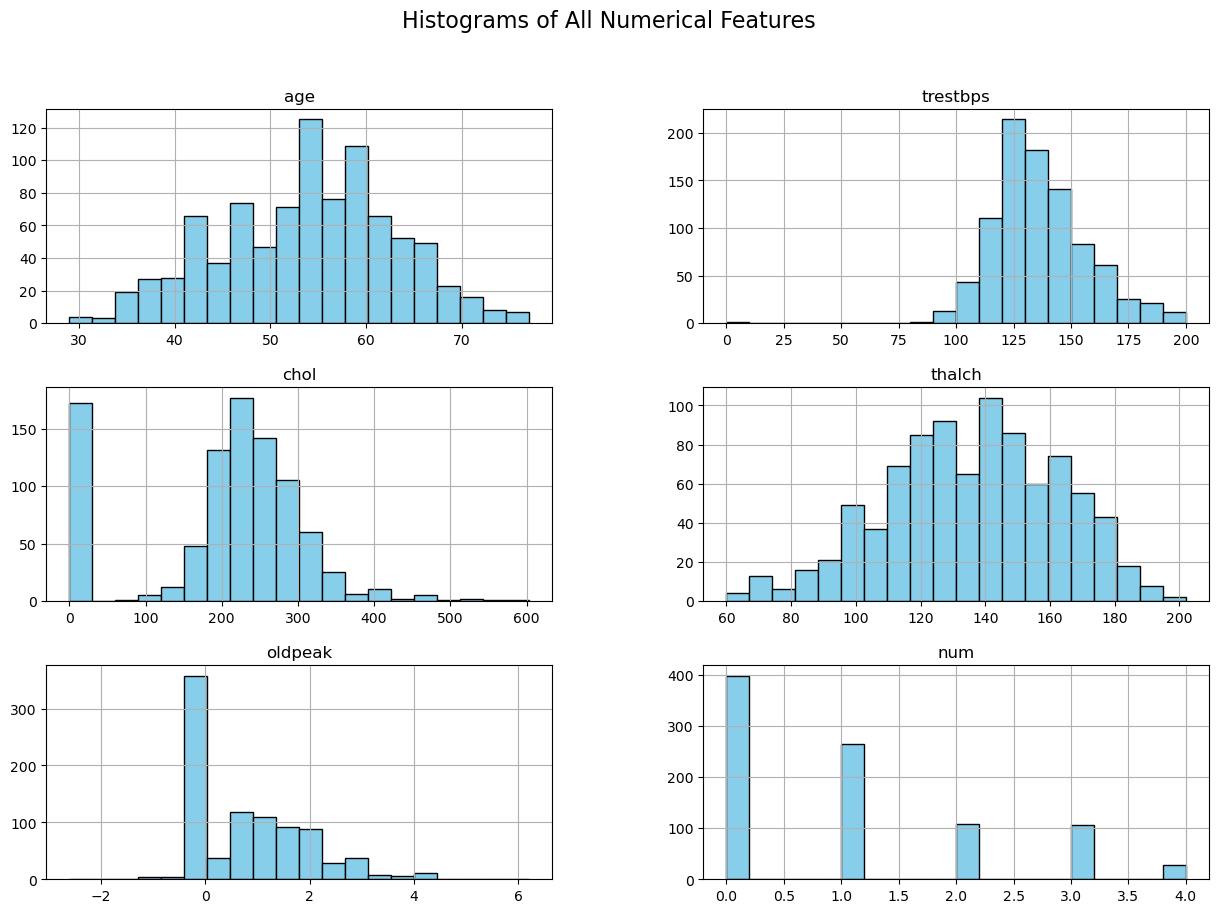

In [13]:
df.hist(figsize=(15, 10),bins=20,color='skyblue',edgecolor='black')
plt.suptitle('Histograms of All Numerical Features',fontsize=16)
plt.show()

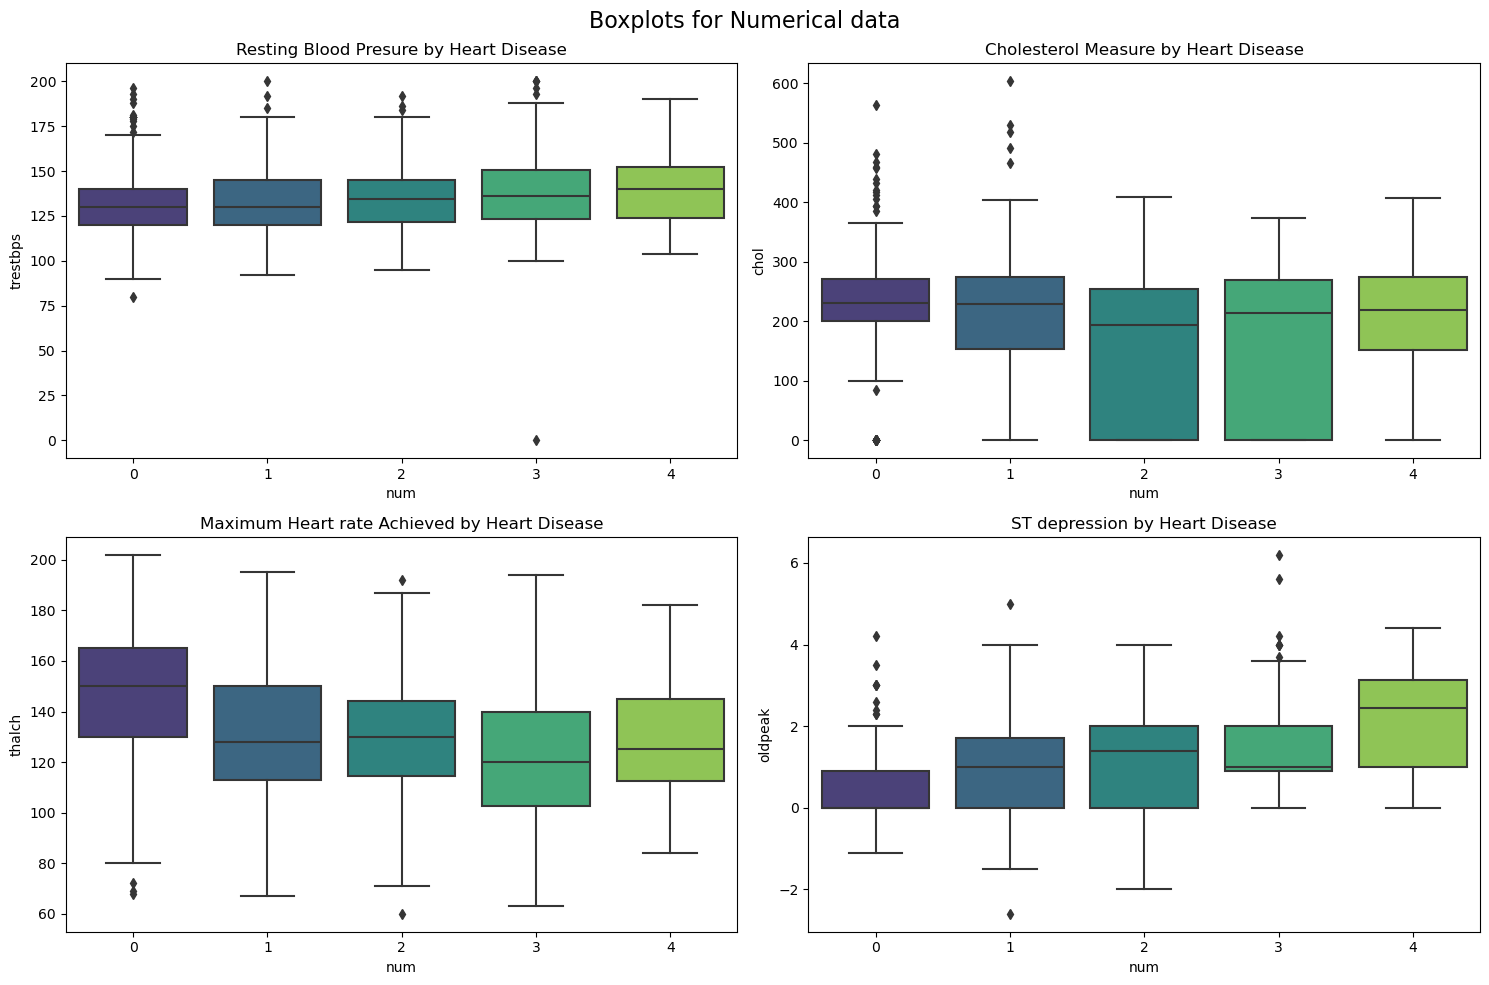

In [14]:
# Plotting Boxplots to see the outliers
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(x='num',y='trestbps',data=df,palette='viridis')
plt.title('Resting Blood Presure by Heart Disease')

plt.subplot(2,2,2)
sns.boxplot(x='num',y='chol',data=df,palette='viridis')
plt.title('Cholesterol Measure by Heart Disease')

plt.subplot(2,2,3)
sns.boxplot(x='num',y='thalch',data=df,palette='viridis')
plt.title('Maximum Heart rate Achieved by Heart Disease')

plt.subplot(2,2,4)
sns.boxplot(x='num',y='oldpeak',data=df,palette='viridis')
plt.title('ST depression by Heart Disease')

plt.suptitle('Boxplots for Numerical data',fontsize=16)
plt.tight_layout()
plt.show()

In [15]:
def remove_outliers(df,columns):
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        
        df=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]
    return df

In [16]:
columns_to_check=['trestbps','chol','thalch','oldpeak']

In [17]:
df_cleaned=remove_outliers(df,columns_to_check)

In [18]:
features=df_cleaned.drop('num',axis=1)
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.300000,downsloping,fixed defect
1,41,Male,atypical angina,135,203,False,normal,132,False,0.000000,flat,fixed defect
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.400000,flat,fixed defect
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.000000,flat,fixed defect
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.500000,flat,fixed defect
...,...,...,...,...,...,...,...,...,...,...,...,...
897,63,Male,asymptomatic,170,177,False,normal,84,True,2.500000,downsloping,fixed defect
902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,True,3.000000,flat,fixed defect
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.000000,flat,normal
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.891253,downsloping,fixed defect


In [19]:
target=df_cleaned[['num']]
target

,num
0,0
1,0
2,0
3,0
4,0
...,...
897,4
902,4
904,4
906,4


In [20]:
corr_matrix=features.corr(numeric_only=True)
corr_matrix

,age,trestbps,chol,fbs,thalch,oldpeak
age,1.000000,0.253534,0.062507,0.213701,-0.333326,0.243775
trestbps,0.253534,1.000000,0.141827,0.170582,-0.149702,0.175229
chol,0.062507,0.141827,1.000000,0.033861,-0.002923,0.039333
fbs,0.213701,0.170582,0.033861,1.000000,-0.087582,0.035924
thalch,-0.333326,-0.149702,-0.002923,-0.087582,1.000000,-0.242436
oldpeak,0.243775,0.175229,0.039333,0.035924,-0.242436,1.000000


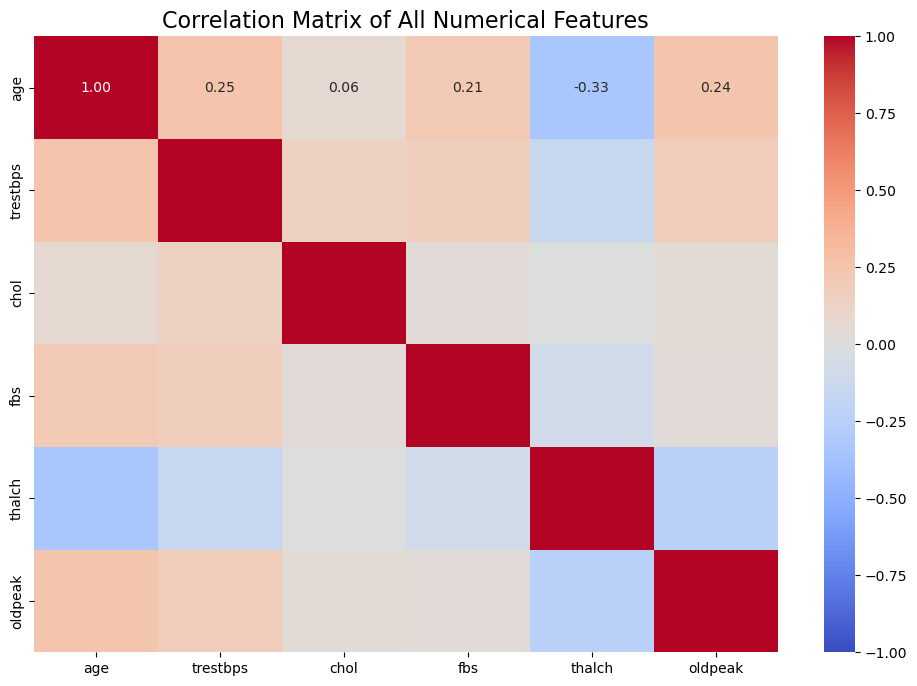

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm',vmin=-1,vmax=1,cbar=True)
plt.title('Correlation Matrix of All Numerical Features',fontsize=16)
plt.show()

In [22]:
cat_col=[i for i in features.columns if features[i].dtypes=='O']
cat_col

['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

In [23]:
features=pd.get_dummies(features,dtype='int')

In [24]:
features

,age,trestbps,chol,fbs,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,exang_False,exang_True,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.300000,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1,41,135,203,False,132,0.000000,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
2,57,140,192,False,148,0.400000,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0
3,52,118,186,False,190,0.000000,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
4,57,110,201,False,126,1.500000,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,63,170,177,False,84,2.500000,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
902,62,160,254,True,108,3.000000,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
904,62,166,170,False,120,3.000000,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
906,56,144,208,True,105,0.891253,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0


In [25]:
onehot=OneHotEncoder()

In [26]:
features[['fbs_False','fbs_True']]=onehot.fit_transform(features[['fbs']]).toarray()

In [27]:
features.drop('fbs',axis=1,inplace=True)

In [28]:
features

,age,trestbps,chol,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,...,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,fbs_False,fbs_True
0,63,145,233,150,2.300000,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0.0,1.0
1,41,135,203,132,0.000000,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1.0,0.0
2,57,140,192,148,0.400000,0,1,1,0,0,...,0,0,0,1,0,1,0,0,1.0,0.0
3,52,118,186,190,0.000000,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1.0,0.0
4,57,110,201,126,1.500000,0,1,1,0,0,...,0,0,0,1,0,1,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,63,170,177,84,2.500000,0,1,1,0,0,...,0,0,1,0,0,1,0,0,1.0,0.0
902,62,160,254,108,3.000000,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0.0,1.0
904,62,166,170,120,3.000000,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1.0,0.0
906,56,144,208,105,0.891253,0,1,0,0,1,...,0,1,1,0,0,1,0,0,0.0,1.0


In [29]:
std_sca=StandardScaler()

In [30]:
features[['age','trestbps','chol','thalch','oldpeak']]=std_sca.fit_transform(features[['age','trestbps','chol','thalch','oldpeak']])

In [31]:
features

,age,trestbps,chol,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,...,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,fbs_False,fbs_True
0,1.085850,0.689832,-0.194128,0.407050,1.529430,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0.0,1.0
1,-1.325672,0.122690,-0.777357,-0.291712,-0.887812,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1.0,0.0
2,0.428162,0.406261,-0.991207,0.329410,-0.467422,0,1,1,0,0,...,0,0,0,1,0,1,0,0,1.0,0.0
3,-0.119911,-0.841452,-1.107852,1.959853,-0.887812,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1.0,0.0
4,0.428162,-1.295166,-0.816238,-0.524632,0.688650,0,1,1,0,0,...,0,0,0,1,0,1,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,1.085850,2.107687,-1.282821,-2.155075,1.739625,0,1,1,0,0,...,0,0,1,0,0,1,0,0,1.0,0.0
902,0.976236,1.540545,0.214131,-1.223394,2.265112,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0.0,1.0
904,0.976236,1.880830,-1.418907,-0.757553,2.265112,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1.0,0.0
906,0.318548,0.633117,-0.680152,-1.339854,0.048873,0,1,0,0,1,...,0,1,1,0,0,1,0,0,0.0,1.0


In [32]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(553, 26)
(139, 26)
(553, 1)
(139, 1)


In [34]:
dec_tree=DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=3)

In [35]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, splitter='random')

In [36]:
y_pred=dec_tree.predict(x_test)

In [37]:
accuracy_score(y_test,y_pred)

0.6906474820143885

In [38]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5,6,7,8,9]}

In [39]:
grid_search=GridSearchCV(dec_tree,params)

In [40]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, splitter='random'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']})

In [41]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'splitter': 'best'}

#### Trying with different parameters

In [42]:
dec_tree=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=2)

In [43]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [44]:
y_pred=dec_tree.predict(x_test)

In [45]:
accuracy_score(y_test,y_pred)

0.6618705035971223

In [46]:
dec_tree=DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=3)

In [47]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter='random')

In [48]:
y_pred=dec_tree.predict(x_test)

In [49]:
accuracy_score(y_test,y_pred)

0.6474820143884892

In [50]:
dec_tree=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3)

In [51]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [52]:
y_pred=dec_tree.predict(x_test)

In [53]:
accuracy_score(y_test,y_pred)

0.6546762589928058

#### Visualization

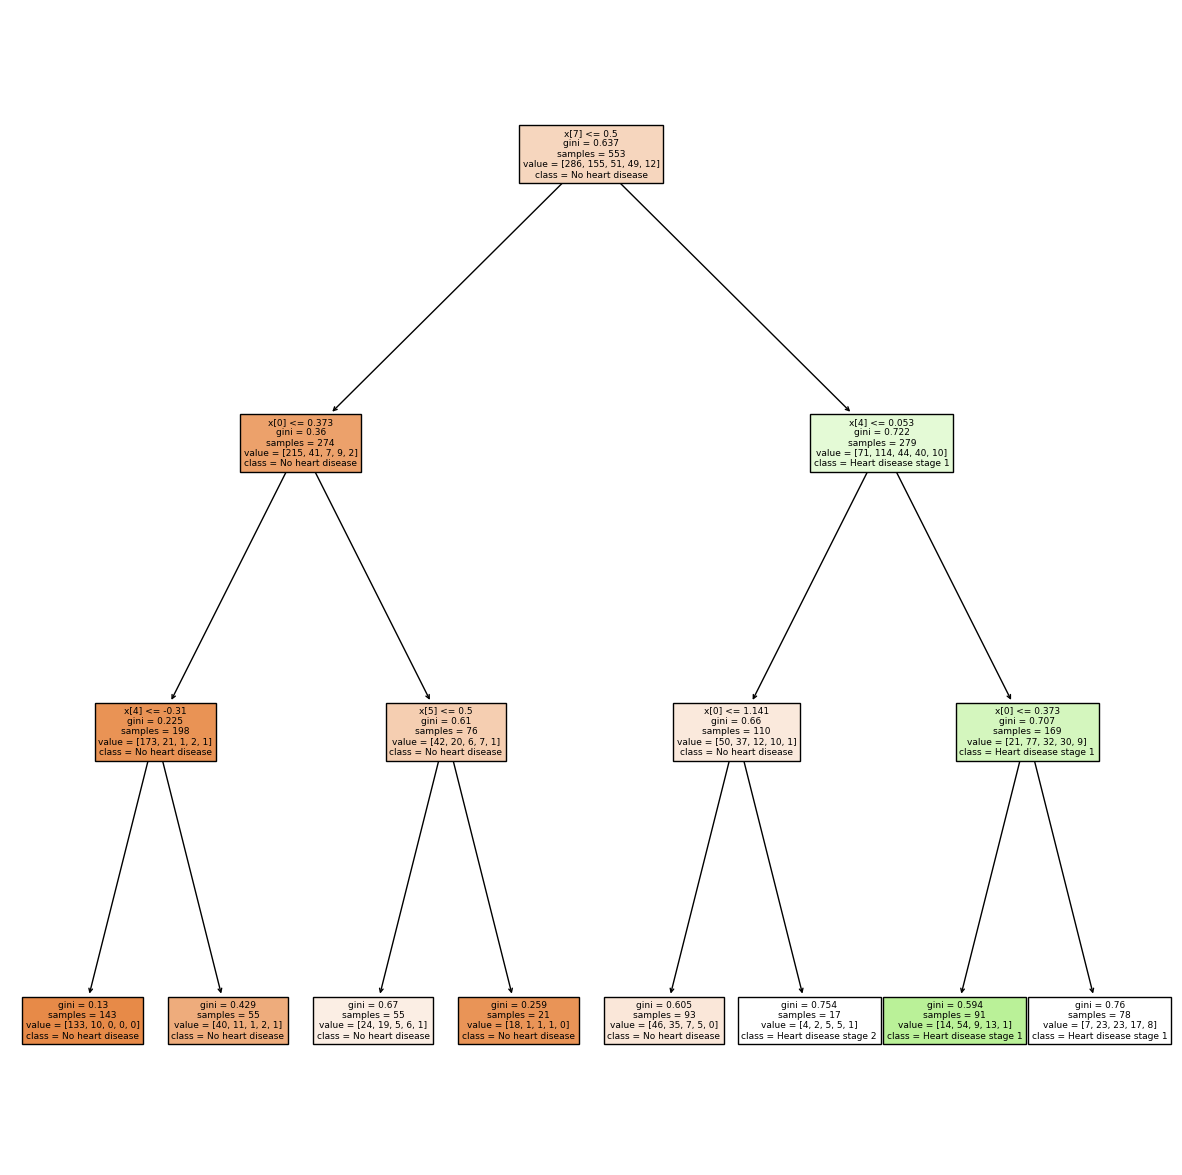

In [54]:
plt.figure(figsize=(15,15))
plot_tree(dec_tree,max_depth=3,filled=True,class_names=['No heart disease','Heart disease stage 1','Heart disease stage 2','Heart disease stage 3','Heart disease stage 4']);

#### Identifying important features

In [55]:
clf=DecisionTreeClassifier(random_state=100)

In [56]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=100)

In [57]:
importances=clf.feature_importances_

In [58]:
feature_names=features.columns

In [59]:
feature_importances=pd.DataFrame({'Feature':feature_names,'Importance':importances})

In [60]:
feature_importances=feature_importances.sort_values(by='Importance',ascending=False)

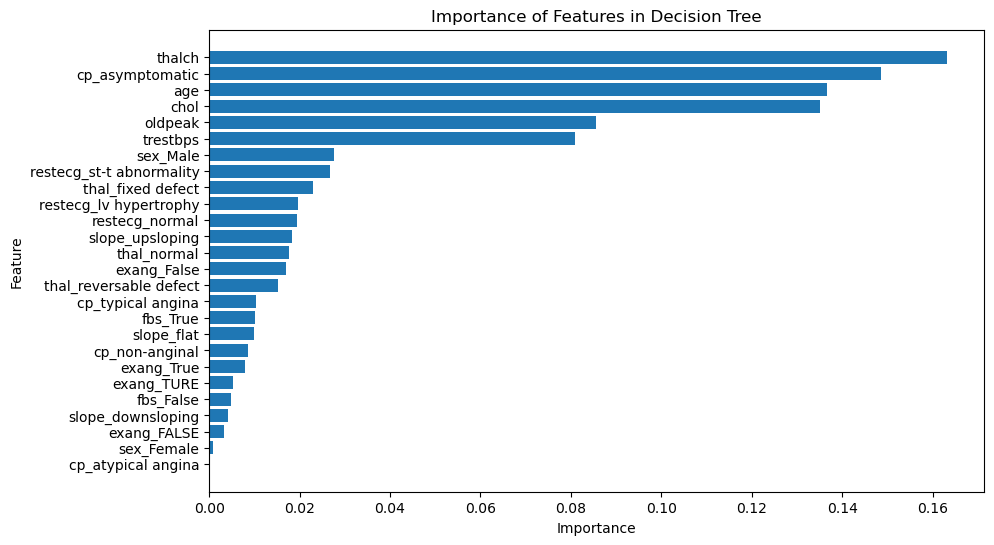

In [61]:
plt.figure(figsize=(10,6))
plt.barh(feature_importances['Feature'],feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Importance of Features in Decision Tree')
plt.gca().invert_yaxis()
plt.show()

## Evaluated without removing the outliers

In [62]:
features1=df.drop('num',axis=1)
features1

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.300000,downsloping,fixed defect
1,41,Male,atypical angina,135,203,False,normal,132,False,0.000000,flat,fixed defect
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.400000,flat,fixed defect
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.000000,flat,fixed defect
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.500000,flat,fixed defect
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.500000,upsloping,reversable defect
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.000000,flat,normal
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.500000,downsloping,fixed defect
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.891253,downsloping,fixed defect


In [63]:
target1=df[['num']]
target1

,num
0,0
1,0
2,0
3,0
4,0
...,...
903,4
904,4
905,4
906,4


In [64]:
features1=pd.get_dummies(features1,dtype='int')

In [65]:
features1

,age,trestbps,chol,fbs,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,exang_False,exang_True,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.300000,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1,41,135,203,False,132,0.000000,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
2,57,140,192,False,148,0.400000,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0
3,52,118,186,False,190,0.000000,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
4,57,110,201,False,126,1.500000,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.500000,0,1,1,0,...,1,0,0,0,0,0,1,0,0,1
904,62,166,170,False,120,3.000000,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
905,56,170,0,False,123,2.500000,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
906,56,144,208,True,105,0.891253,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0


In [66]:
features1[['fbs_False','fbs_True']]=onehot.fit_transform(features1[['fbs']]).toarray()

In [67]:
features1.drop('fbs',axis=1,inplace=True)

In [68]:
features1

,age,trestbps,chol,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,...,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,fbs_False,fbs_True
0,63,145,233,150,2.300000,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0.0,1.0
1,41,135,203,132,0.000000,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1.0,0.0
2,57,140,192,148,0.400000,0,1,1,0,0,...,0,0,0,1,0,1,0,0,1.0,0.0
3,52,118,186,190,0.000000,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1.0,0.0
4,57,110,201,126,1.500000,0,1,1,0,0,...,0,0,0,1,0,1,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,120,1.500000,0,1,1,0,0,...,0,0,0,0,1,0,0,1,1.0,0.0
904,62,166,170,120,3.000000,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1.0,0.0
905,56,170,0,123,2.500000,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1.0,0.0
906,56,144,208,105,0.891253,0,1,0,0,1,...,0,1,1,0,0,1,0,0,0.0,1.0


In [69]:
features1[['age','trestbps','chol','thalch','oldpeak']]=std_sca.fit_transform(features1[['age','trestbps','chol','thalch','oldpeak']])

In [70]:
features1

,age,trestbps,chol,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,...,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,fbs_False,fbs_True
0,1.006097,0.568184,0.281318,0.523285,1.333854,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0.0,1.0
1,-1.396447,0.077848,0.013691,-0.148399,-0.845392,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1.0,0.0
2,0.350858,0.323016,-0.084439,0.448654,-0.466392,0,1,1,0,0,...,0,0,0,1,0,1,0,0,1.0,0.0
3,-0.195175,-0.755723,-0.137964,2.015918,-0.845392,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1.0,0.0
4,0.350858,-1.147992,-0.004151,-0.372294,0.575856,0,1,1,0,0,...,0,0,0,1,0,1,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.085969,-0.412488,-1.797250,-0.596189,0.575856,0,1,1,0,0,...,0,0,0,0,1,0,0,1,1.0,0.0
904,0.896890,1.597890,-0.280698,-0.596189,1.997103,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1.0,0.0
905,0.241651,1.794024,-1.797250,-0.484242,1.523354,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1.0,0.0
906,0.241651,0.519151,0.058296,-1.155926,-0.000931,0,1,0,0,1,...,0,1,1,0,0,1,0,0,0.0,1.0


In [71]:
x_train,x_test,y_train,y_test=train_test_split(features1,target1,train_size=0.8,random_state=100)

In [72]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(725, 26)
(182, 26)
(725, 1)
(182, 1)


In [73]:
dec_tree1=DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=3)

In [74]:
dec_tree1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, splitter='random')

In [75]:
y_pred1=dec_tree.predict(x_test)

In [76]:
accuracy_score(y_test,y_pred1)

0.532967032967033

### Interview Questions

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

2. What is the difference between the Label encoding and One-hot encoding?

Label Encoding: Converts categories to numerical values but may imply an order that doesn’t exist. Best for ordinal data. It assigns each unique category in a feature a unique integer value. For instance, if a feature "Color" has categories "Red," "Green," and "Blue," Label Encoding map them to 0, 1, and 2, respectively.

One-Hot Encoding: Converts each category to a binary vector without implying any order. Best for nominal data. For each row, a binary vector is created where only the column corresponding to the category is set to 1, and all others are set to 0.